# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#print

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
api_key = weather_api_key
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={api_key}&units=metric"
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
       

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatsky&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
http://api.openweathermap.org/data/2.5/weather?q=thompson&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 2 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 3 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=keflavik&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 4 of Set 1 | keflavik
http://api.openweathermap.org/data/2.5/weather?q=whitehorse&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 5 of Set 1 | whitehorse
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 6 of Set 1

http://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 3 of Set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=puerto palomas&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 4 of Set 2 | puerto palomas
http://api.openweathermap.org/data/2.5/weather?q=kavaratti&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 5 of Set 2 | kavaratti
http://api.openweathermap.org/data/2.5/weather?q=benguela&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 6 of Set 2 | benguela
http://api.openweathermap.org/data/2.5/weather?q=hauterive&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 7 of Set 2 | hauterive
http://api.openweathermap.org/data/2.5/weather?q=egilsstadir&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 8 of Set 2 | egilsstadir
http://api.openweathermap.org/data/2.5/weather?q=tsiombe&appid=aff19b2

http://api.openweathermap.org/data/2.5/weather?q=north bondi&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 7 of Set 3 | north bondi
http://api.openweathermap.org/data/2.5/weather?q=noosa heads&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 8 of Set 3 | noosa heads
http://api.openweathermap.org/data/2.5/weather?q=haiku-pauwela&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 9 of Set 3 | haiku-pauwela
http://api.openweathermap.org/data/2.5/weather?q=hasaki&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 10 of Set 3 | hasaki
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 11 of Set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?q=fuvahmulah&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 12 of Set 3 | fuvahmulah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?q=ataq&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 12 of Set 4 | ataq
http://api.openweathermap.org/data/2.5/weather?q=saint-yrieix-sur-charente&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 13 of Set 4 | saint-yrieix-sur-charente
http://api.openweathermap.org/data/2.5/weather?q=ginir&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 14 of Set 4 | ginir
http://api.openweathermap.org/data/2.5/weather?q=vernon&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 15 of Set 4 | vernon
http://api.openweathermap.org/data/2.5/weather?q=porto belo&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 16 of Set 4 | porto belo
http://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 17 of Set 4 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=kapuskasing&appid=aff19b2

http://api.openweathermap.org/data/2.5/weather?q=chak two hundred forty-nine thal development authority&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 17 of Set 5 | chak two hundred forty-nine thal development authority
http://api.openweathermap.org/data/2.5/weather?q=greymouth&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 18 of Set 5 | greymouth
http://api.openweathermap.org/data/2.5/weather?q=lemoore station&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 19 of Set 5 | lemoore station
http://api.openweathermap.org/data/2.5/weather?q=tralee&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 20 of Set 5 | tralee
http://api.openweathermap.org/data/2.5/weather?q=sinop&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 21 of Set 5 | sinop
http://api.openweathermap.org/data/2.5/weather?q=mirandela&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 22 of Set 5 | mira

http://api.openweathermap.org/data/2.5/weather?q=essaouira&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 21 of Set 6 | essaouira
http://api.openweathermap.org/data/2.5/weather?q=tuzantla&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 22 of Set 6 | tuzantla
http://api.openweathermap.org/data/2.5/weather?q=dazhong&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 23 of Set 6 | dazhong
http://api.openweathermap.org/data/2.5/weather?q=tibu&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 24 of Set 6 | tibu
http://api.openweathermap.org/data/2.5/weather?q=pitkyaranta&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 25 of Set 6 | pitkyaranta
http://api.openweathermap.org/data/2.5/weather?q=ligatne&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 26 of Set 6 | ligatne
http://api.openweathermap.org/data/2.5/weather?q=micheweni&appid=aff19b2e9f6c2991174558d542411bc1&

http://api.openweathermap.org/data/2.5/weather?q=mount gambier&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 25 of Set 7 | mount gambier
http://api.openweathermap.org/data/2.5/weather?q=tamandare&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 26 of Set 7 | tamandare
http://api.openweathermap.org/data/2.5/weather?q=santiago de cao&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 27 of Set 7 | santiago de cao
http://api.openweathermap.org/data/2.5/weather?q=gharavuti&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 28 of Set 7 | gharavuti
http://api.openweathermap.org/data/2.5/weather?q=abong mbang&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 29 of Set 7 | abong mbang
http://api.openweathermap.org/data/2.5/weather?q=kristiansund&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 30 of Set 7 | kristiansund
http://api.openweathermap.org/data/2.5/weather?q=tol

http://api.openweathermap.org/data/2.5/weather?q=howrah&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 29 of Set 8 | howrah
http://api.openweathermap.org/data/2.5/weather?q=ayod&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 30 of Set 8 | ayod
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=san francisco de la paz&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 31 of Set 8 | san francisco de la paz
http://api.openweathermap.org/data/2.5/weather?q=igrim&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 32 of Set 8 | igrim
http://api.openweathermap.org/data/2.5/weather?q=fuglafjordur&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 33 of Set 8 | fuglafjordur
http://api.openweathermap.org/data/2.5/weather?q=senanga&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 34 of Set 8 | senanga
http://api.openweathermap.org/data/2.5/weather?q

http://api.openweathermap.org/data/2.5/weather?q=henderson&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 33 of Set 9 | henderson
http://api.openweathermap.org/data/2.5/weather?q=cuyo&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 34 of Set 9 | cuyo
http://api.openweathermap.org/data/2.5/weather?q=kushiro&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 35 of Set 9 | kushiro
http://api.openweathermap.org/data/2.5/weather?q=kenai&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 36 of Set 9 | kenai
http://api.openweathermap.org/data/2.5/weather?q=tarko-sale&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 37 of Set 9 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?q=general acha&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 38 of Set 9 | general acha
http://api.openweathermap.org/data/2.5/weather?q=jieshi&appid=aff19b2e9f6c2991174558d542411bc1&u

http://api.openweathermap.org/data/2.5/weather?q=warmbad&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 38 of Set 10 | warmbad
http://api.openweathermap.org/data/2.5/weather?q=mersing&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 39 of Set 10 | mersing
http://api.openweathermap.org/data/2.5/weather?q=bouna&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 40 of Set 10 | bouna
http://api.openweathermap.org/data/2.5/weather?q=carauari&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 41 of Set 10 | carauari
http://api.openweathermap.org/data/2.5/weather?q=bambanglipuro&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 42 of Set 10 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?q=tinajo&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 43 of Set 10 | tinajo
http://api.openweathermap.org/data/2.5/weather?q=staritsa&appid=aff19b2e9f6c2991174558d54241

http://api.openweathermap.org/data/2.5/weather?q=oranjestad&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 43 of Set 11 | oranjestad
http://api.openweathermap.org/data/2.5/weather?q=bazarnyy karabulak&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 44 of Set 11 | bazarnyy karabulak
http://api.openweathermap.org/data/2.5/weather?q=bazar-e yakawlang&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 45 of Set 11 | bazar-e yakawlang
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=novokruchininskiy&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 46 of Set 11 | novokruchininskiy
http://api.openweathermap.org/data/2.5/weather?q=pokhara&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 47 of Set 11 | pokhara
http://api.openweathermap.org/data/2.5/weather?q=harlingen&appid=aff19b2e9f6c2991174558d542411bc1&units=metric
Processing Record 48 of Set 11 | harlingen


SyntaxError: 'break' outside loop (2154852700.py, line 75)

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,72,75,2.24,RU,1701975340
1,thompson,55.7435,-97.8558,-9.91,92,75,0.00,CA,1701975340
2,ribeira grande,38.5167,-28.7000,18.22,77,20,6.71,PT,1701975340
3,keflavik,64.0049,-22.5624,1.24,60,0,6.17,IS,1701975340
4,whitehorse,60.7161,-135.0538,-3.57,79,75,7.72,CA,1701975340


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,72,75,2.24,RU,1701975340
1,thompson,55.7435,-97.8558,-9.91,92,75,0.00,CA,1701975340
2,ribeira grande,38.5167,-28.7000,18.22,77,20,6.71,PT,1701975340
3,keflavik,64.0049,-22.5624,1.24,60,0,6.17,IS,1701975340
4,whitehorse,60.7161,-135.0538,-3.57,79,75,7.72,CA,1701975340


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

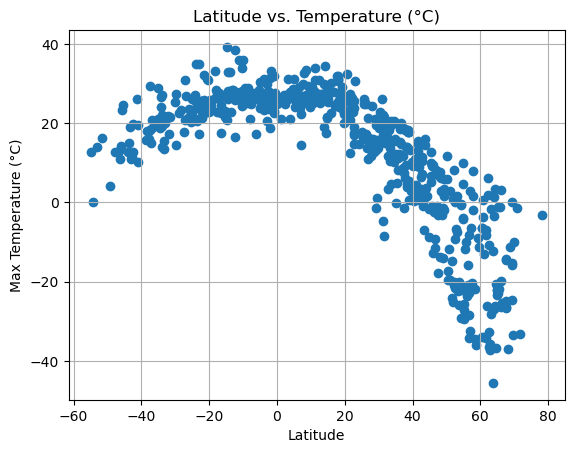

In [10]:
# Build scatter plot for latitude vs. temperature
x_value = [city["Lat"] for city in city_data]
y_value = [city["Max Temp"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

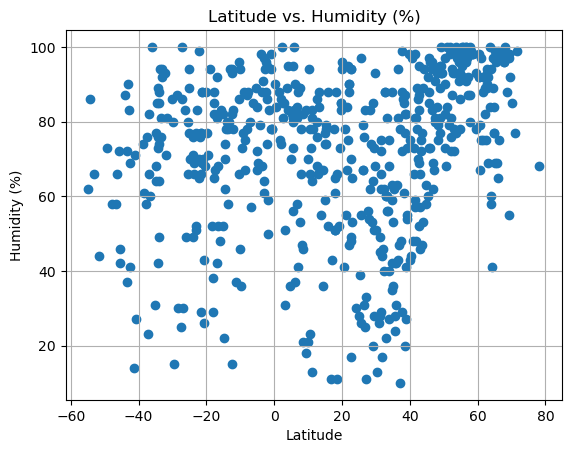

In [11]:
# Build the scatter plots for latitude vs. humidity
x_value = [city["Lat"] for city in city_data]
y_value = [city["Humidity"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

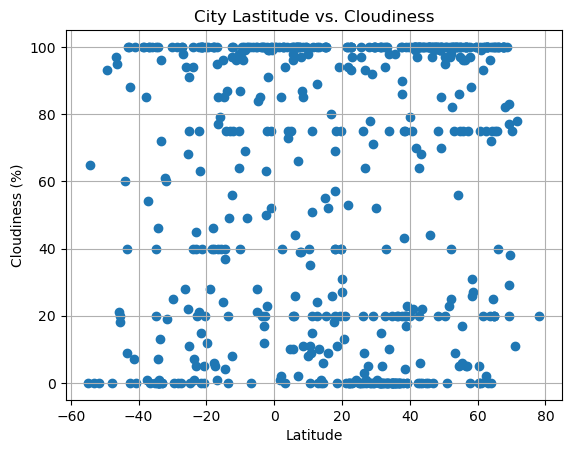

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_value = [city["Lat"] for city in city_data]
y_value = [city["Cloudiness"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Lastitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

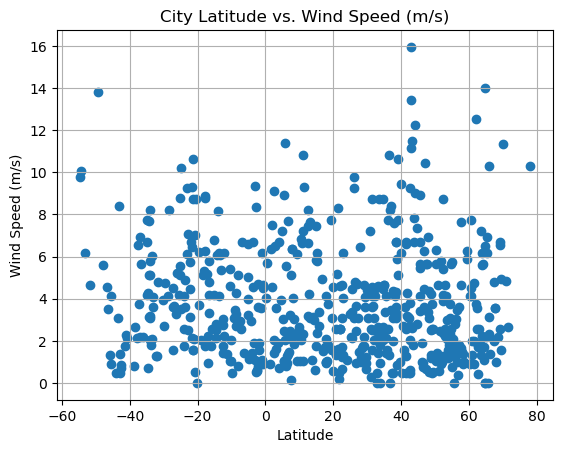

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_value = [city["Lat"] for city in city_data]
y_value = [city["Wind Speed"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,72,75,2.24,RU,1701975340
1,thompson,55.7435,-97.8558,-9.91,92,75,0.00,CA,1701975340
2,ribeira grande,38.5167,-28.7000,18.22,77,20,6.71,PT,1701975340
3,keflavik,64.0049,-22.5624,1.24,60,0,6.17,IS,1701975340
4,whitehorse,60.7161,-135.0538,-3.57,79,75,7.72,CA,1701975340


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port lincoln,-34.7333,135.8667,20.18,64,100,0.70,AU,1701975341
6,tanjungagung,-3.9333,103.8000,23.19,98,100,1.42,ID,1701975341
7,port-aux-francais,-49.3500,70.2167,4.09,73,93,13.81,TF,1701975341
8,port alfred,-33.5906,26.8910,20.10,94,13,1.79,ZA,1701975316
11,christchurch,-43.5333,172.6333,14.95,72,40,3.09,NZ,1701975341


###  Temperature vs. Latitude Linear Regression Plot

the r-value is : -0.8600677604704294


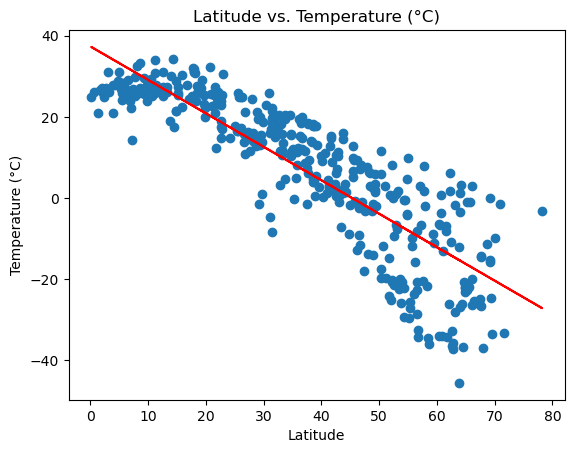

In [18]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Temperature (°C)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
print(f"the r-value is : {rvalue}")
plt.show()

the r-value is : 0.6482976558934143


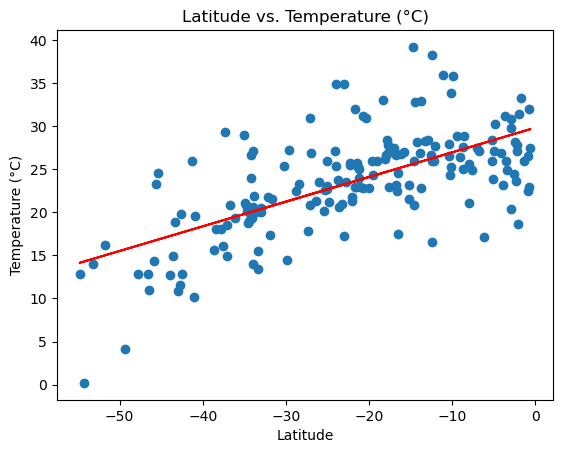

In [26]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Temperature (°C)")
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
print(f"the r-value is : {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the nothern hemisphere there is a strong negative corrilation between latitude and temperature indicating the farther north/ higher ones latitude is the colder the temperature is. For the Southern hemisphere there is a medium to strong positive corrilation between latitude and temperature. This means that it is the inverse of the northern hemisphere where the farther south the city the colder the temperature. Therefore it can be concluded that the closer a cities latitude is to 0 then the warmer it will most likely be

### Humidity vs. Latitude Linear Regression Plot

the r-value is : 0.34863129655298


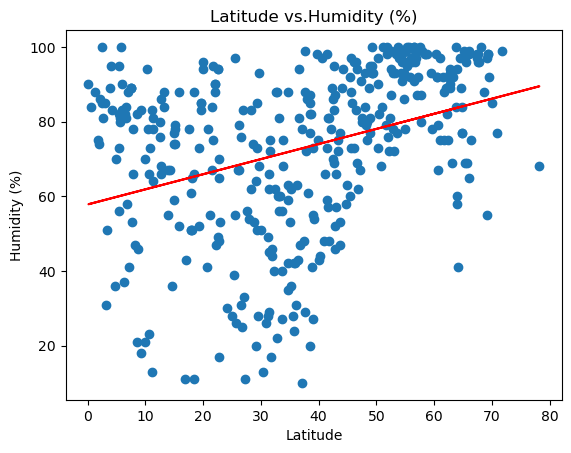

In [20]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs.Humidity (%)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"the r-value is : {rvalue}")
plt.show()

the r-value is : 0.22682186391252354


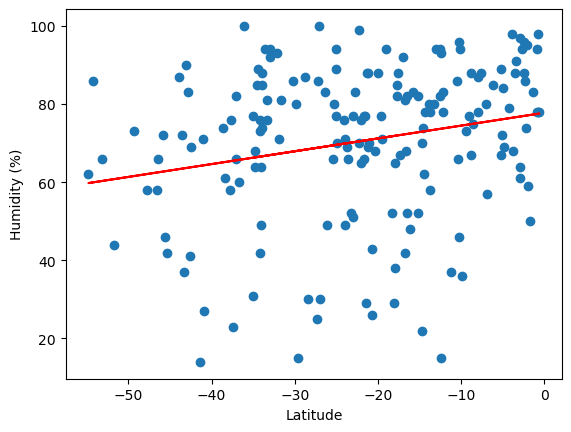

In [25]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"the r-value is : {rvalue}")
plt.show()

**Discussion about the linear relationship:** reagrding humidity there is a far weaker corrilation in the north and southern hemisphere than temperature. With the Northern hemispere having a weak to medium strength corilation and the southern having a week corrilation. Therefore it can be said that regarding humidity ones latitude plays a very small role in determining humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is : 0.15476006010180193


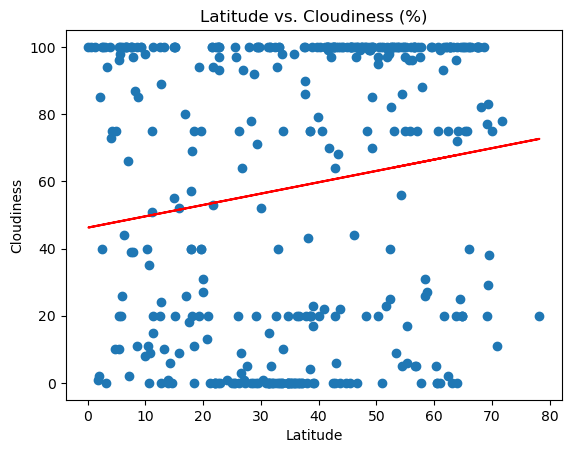

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Cloudiness (%)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"the r-value is : {rvalue}")
plt.show()

the r-value is : 0.2799311354824627


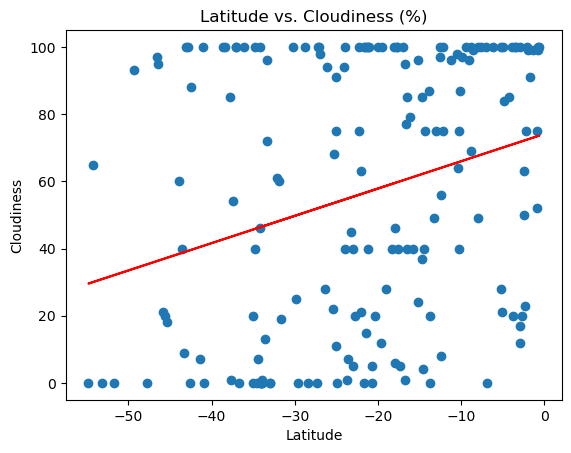

In [21]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Cloudiness (%)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"the r-value is : {rvalue}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres have weak r values regarding latitude and cloudiness. Therefore, there is a weak to non existant corrilation between the latitude and cloudiness of a city.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is : -7.127041668909131e-05


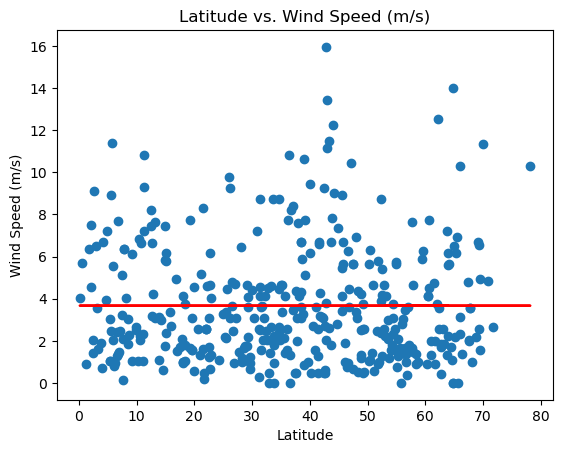

In [23]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Wind Speed (m/s)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"the r-value is : {rvalue}")
plt.show()

the r-value is : -0.1437724375905679


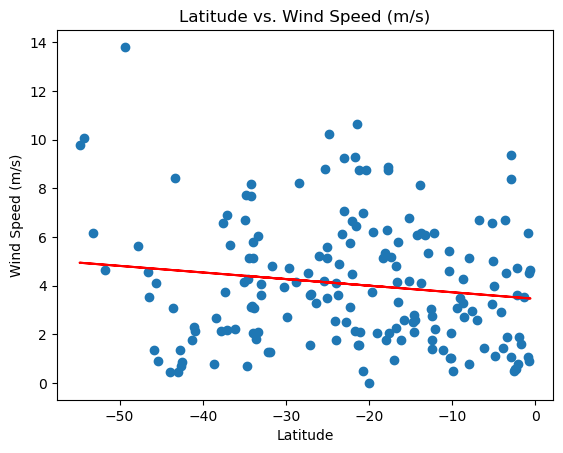

In [24]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.title("Latitude vs. Wind Speed (m/s)")
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"the r-value is : {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the northern and southern hemisphere the r value for wind speed and latitude are the lowest so far leaidng one to believe there is no corrilation between wind speed and latitude.